# Support Vector Machines

## 1. Social Network Ads 

En primer lugar vamos a trabajar con el dataset de Social Networks Ads, un conjunto de datos que permiten determinar si un usuario compró o no un producto en particular. Tanto el dataset como su descripción los pueden encontrar en [Kaggle](https://www.kaggle.com/rakeshrau/social-network-ads).

### Columnas del dataset:
* User ID: identificación de usuario.
* Gender: género.
* Age: edad.
* EstimatedSalary: salario estimado.
* Purchased: compró/no compró un producto en particular.

Ahora sí, a trabajar. En primer lugar, recomendamos hacer una pequeña exploración de datos si tienes tiempo. Luego, sigue los pasos que aquí te dejamos. Si te sientes seguro/a, hasta puedes intentar implementar un SVM sobre ese dataset sin mirar la guía que dejamos. En ese caso, te conviene hacerlo en otro notebook. ¡Inténtalo!

1. Importa las librerías necesarias y carga el dataset.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('DS_Bitácora_25_ads.csv')
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


2. Sólo vamos a utilizar como features las columnas `Age` y `EstimatedSalary` (así podemos visualizar). Y como target a la columna `Purchased`

In [3]:
X = dataset.iloc[:, [2, 3]].values
Y = dataset.iloc[:, 4].values

3. Separa los datos de entrenamiento de los datos de prueba.

In [4]:
from sklearn.model_selection import train_test_split

X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.25, random_state=0)

4. Estandariza los datos (`StandardScaler`).

In [5]:
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
sc_X.fit(X_Train)
X_Train = sc_X.transform(X_Train)
X_Test = sc_X.transform(X_Test)

5. Entrena un SVM. Para ello, utiliza la clase `SVC` de la librería Scikit-Learn cuya documentación la puedes encontrar [aquí](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html).

In [6]:
from sklearn.svm import SVC

classifier = SVC(kernel='linear', random_state=0)
classifier.fit(X_Train, Y_Train)

SVC(kernel='linear', random_state=0)

6. Realiza las predicciones sobre los datos de prueba.

In [7]:
Y_Pred = classifier.predict(X_Test)

7. Visualiza los resultados mediante:
 
* Matriz de confusión (`confusion_matrix`)
* Reporte de clasificación (`classification_report`)
* Gráfico de fronteras de decisión (¡Busca en notebooks anteriores!)

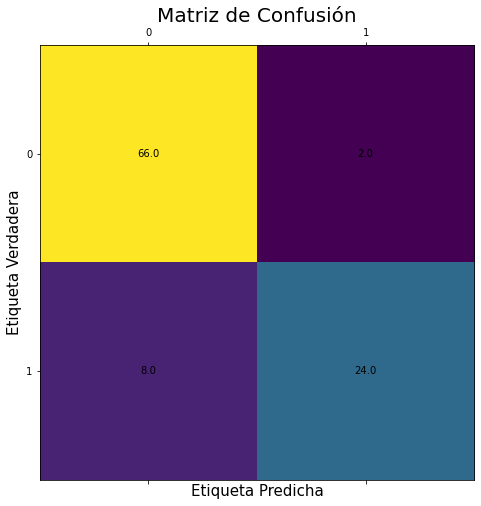

In [8]:
# Matriz de confusión 
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(Y_Test, Y_Pred)

fig, ax = plt.subplots(figsize=(12,8))
ax.matshow(cm)
plt.title('Matriz de Confusión', fontsize=20)
plt.ylabel('Etiqueta Verdadera', fontsize=15)
plt.xlabel('Etiqueta Predicha', fontsize=15)
for (i, j), z in np.ndenumerate(cm):
    ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')

In [9]:
# Reporte de Clasificación
print(classification_report(Y_Test, Y_Pred))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93        68
           1       0.92      0.75      0.83        32

    accuracy                           0.90       100
   macro avg       0.91      0.86      0.88       100
weighted avg       0.90      0.90      0.90       100



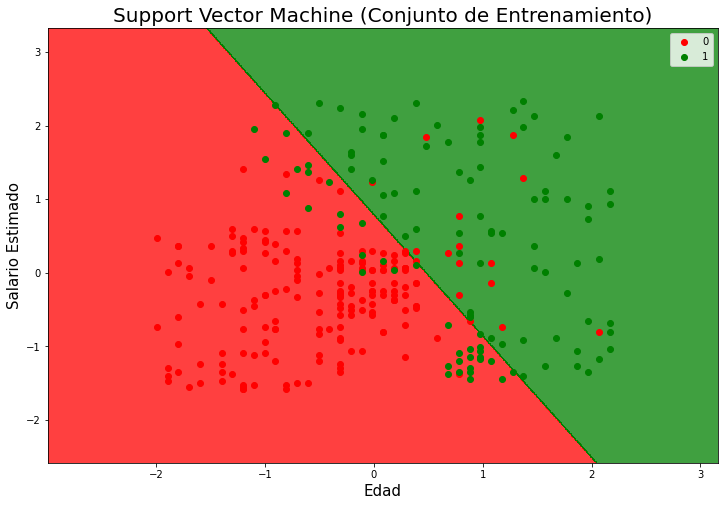

In [10]:
# Visualizando los resultados en el set de entrenamiento
from matplotlib.colors import ListedColormap

X_Set, Y_Set = X_Train, Y_Train
X1, X2 = np.meshgrid(np.arange(start = X_Set[:, 0].min() - 1, stop = X_Set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_Set[:, 1].min() - 1, stop = X_Set[:, 1].max() + 1, step = 0.01))

plt.figure(figsize=(12,8))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(Y_Set)):
    plt.scatter(X_Set[Y_Set == j, 0], X_Set[Y_Set == j, 1],
                c = [ListedColormap(('red', 'green'))(i)], label = j)
plt.title('Support Vector Machine (Conjunto de Entrenamiento)', fontsize=20)
plt.xlabel('Edad', fontsize=15)
plt.ylabel('Salario Estimado', fontsize=15)
plt.legend()
plt.show()

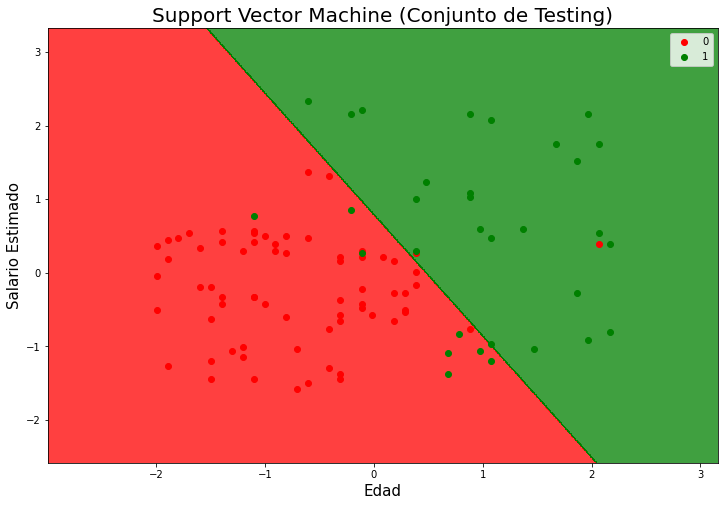

In [11]:
# Visualizando los resultados en el set de testing
X_Set, Y_Set = X_Test, Y_Test
X1, X2 = np.meshgrid(np.arange(start = X_Set[:, 0].min() - 1, stop = X_Set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_Set[:, 1].min() - 1, stop = X_Set[:, 1].max() + 1, step = 0.01))

plt.figure(figsize=(12,8))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(['red', 'green']))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(Y_Set)):
    plt.scatter(X_Set[Y_Set == j, 0], X_Set[Y_Set == j, 1],
                c = [ListedColormap(('red', 'green'))(i)], label = j)
plt.title('Support Vector Machine (Conjunto de Testing)', fontsize=20)
plt.xlabel('Edad', fontsize=15)
plt.ylabel('Salario Estimado', fontsize=15)
plt.legend()
plt.show()

## Armo una funcion que haga la evaluacion y visualizacion

In [12]:
def evaluar_clasificacion(classifier, X_train, X_test, y_train, y_test):
    
    y_pred = classifier.predict(X_test)

    # Matriz de confusión 
    cm = confusion_matrix(y_test, y_pred)
    fig, ax = plt.subplots(figsize=(12,8))
    ax.matshow(cm)
    plt.title('Matriz de Confusión', fontsize=20)
    plt.ylabel('Etiqueta Verdadera', fontsize=15)
    plt.xlabel('Etiqueta Predicha', fontsize=15)
    for (i, j), z in np.ndenumerate(cm):
        ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')
    
    # Reporte de Clasificación
    print(classification_report(y_test, y_pred))    
    
    # Visualizando los resultados en el set de testing
    X_Set, Y_Set = X_test, y_test
    X1, X2 = np.meshgrid(np.arange(start = X_Set[:, 0].min() - 1, stop = X_Set[:, 0].max() + 1, step = 0.01),
                         np.arange(start = X_Set[:, 1].min() - 1, stop = X_Set[:, 1].max() + 1, step = 0.01))

    plt.figure(figsize=(12,8))
    plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                 alpha = 0.75, cmap = ListedColormap(['red', 'green']))
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(Y_Set)):
        plt.scatter(X_Set[Y_Set == j, 0], X_Set[Y_Set == j, 1],
                    c = [ListedColormap(('red', 'green'))(i)], label = j)
    plt.title('Support Vector Machine (Conjunto de Testing)', fontsize=20)
    plt.xlabel('Edad', fontsize=15)
    plt.ylabel('Salario Estimado', fontsize=15)
    plt.legend()
    plt.show()
    
    X_Set, Y_Set = X_Train, Y_Train
    X1, X2 = np.meshgrid(np.arange(start = X_Set[:, 0].min() - 1, stop = X_Set[:, 0].max() + 1, step = 0.01),
                         np.arange(start = X_Set[:, 1].min() - 1, stop = X_Set[:, 1].max() + 1, step = 0.01))

    plt.figure(figsize=(12,8))
    plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                 alpha = 0.75, cmap = ListedColormap(('red', 'green')))
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(Y_Set)):
        plt.scatter(X_Set[Y_Set == j, 0], X_Set[Y_Set == j, 1],
                    c = [ListedColormap(('red', 'green'))(i)], label = j)
    plt.title('Support Vector Machine (Conjunto de Entrenamiento)', fontsize=20)
    plt.xlabel('Edad', fontsize=15)
    plt.ylabel('Salario Estimado', fontsize=15)
    plt.legend()
    plt.show()

**Para probar:**
1. Modifica el `kernel` del clasificador y observar cómo se modifican las fronteras encontradas por el mismo y su performance. Por ejemplo, prueba con con los siguientes kernels: `rbf`, `poly` y `sigmoid`.



              precision    recall  f1-score   support

           0       0.84      0.99      0.91        68
           1       0.95      0.59      0.73        32

    accuracy                           0.86       100
   macro avg       0.89      0.79      0.82       100
weighted avg       0.87      0.86      0.85       100



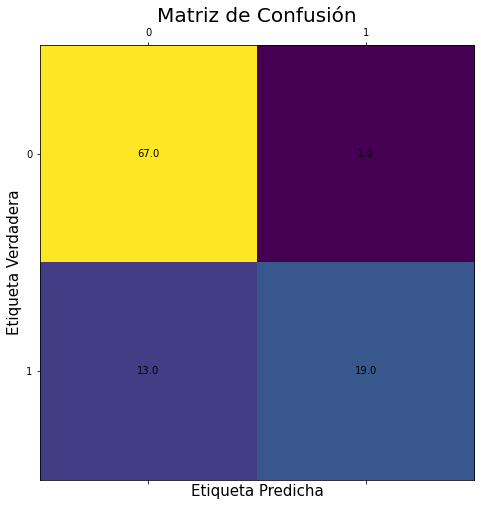

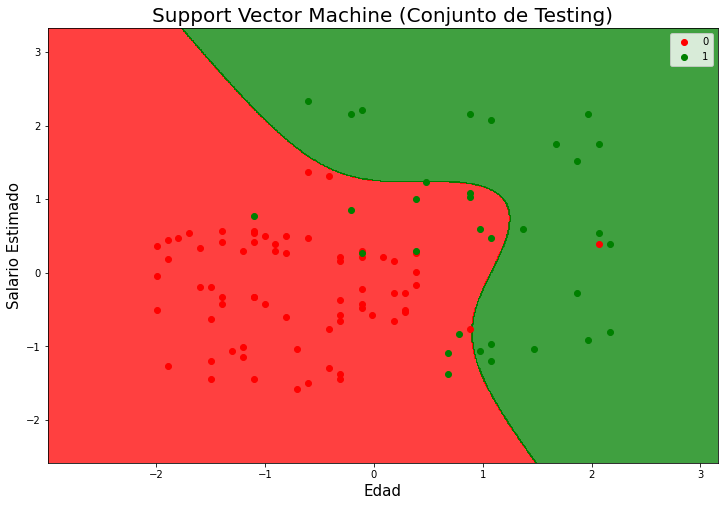

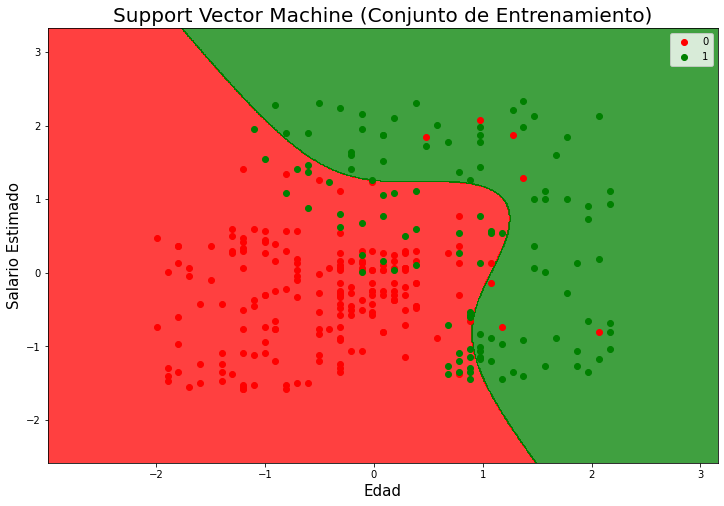

In [13]:
classifier_poly = SVC(kernel='poly', random_state=0)
classifier_poly.fit(X_Train, Y_Train)
evaluar_clasificacion(classifier_poly, X_Train, X_Test,  Y_Train, Y_Test)


              precision    recall  f1-score   support

           0       0.96      0.94      0.95        68
           1       0.88      0.91      0.89        32

    accuracy                           0.93       100
   macro avg       0.92      0.92      0.92       100
weighted avg       0.93      0.93      0.93       100



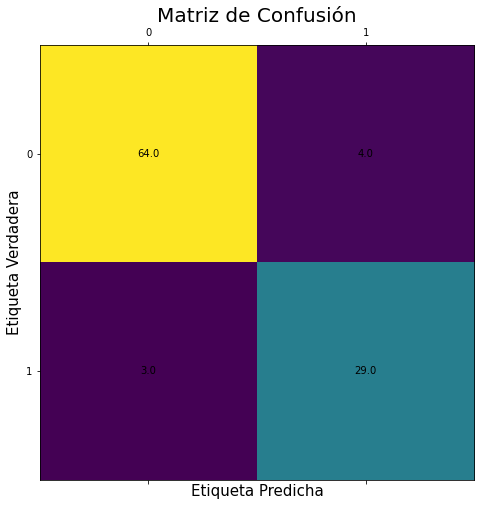

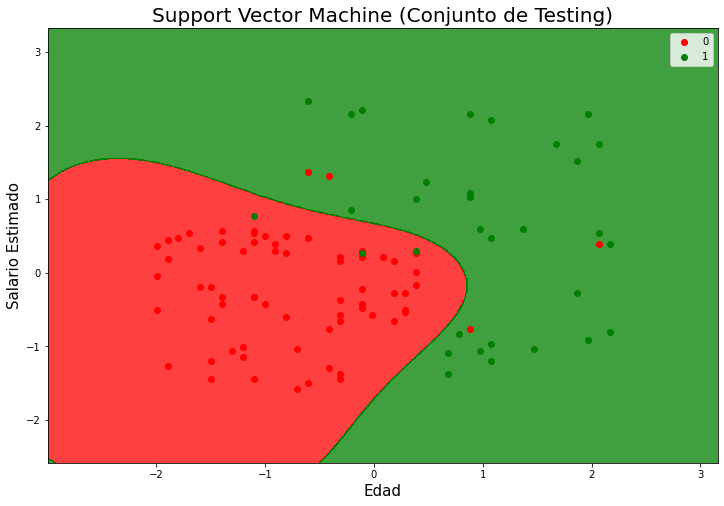

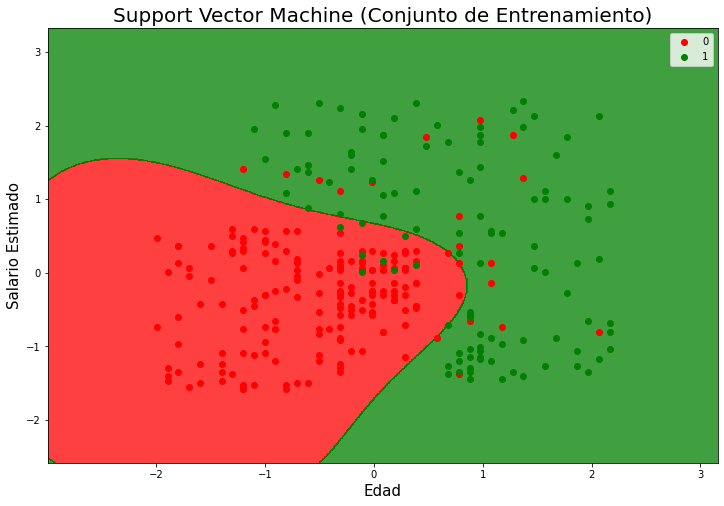

In [14]:
classifier_rbf = SVC(kernel='rbf', random_state=0)
classifier_rbf.fit(X_Train, Y_Train)
evaluar_clasificacion(classifier_rbf, X_Train, X_Test,  Y_Train, Y_Test)

              precision    recall  f1-score   support

           0       0.82      0.79      0.81        68
           1       0.59      0.62      0.61        32

    accuracy                           0.74       100
   macro avg       0.70      0.71      0.71       100
weighted avg       0.74      0.74      0.74       100



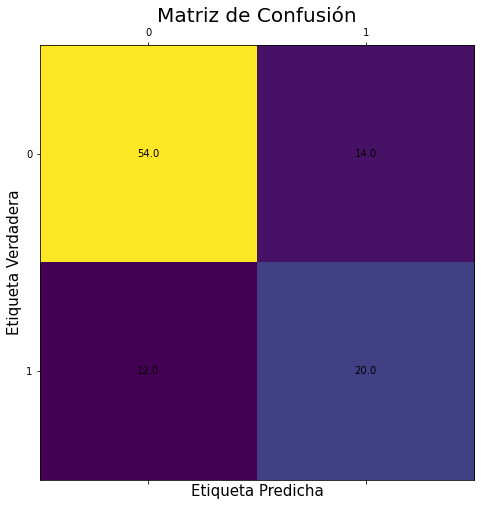

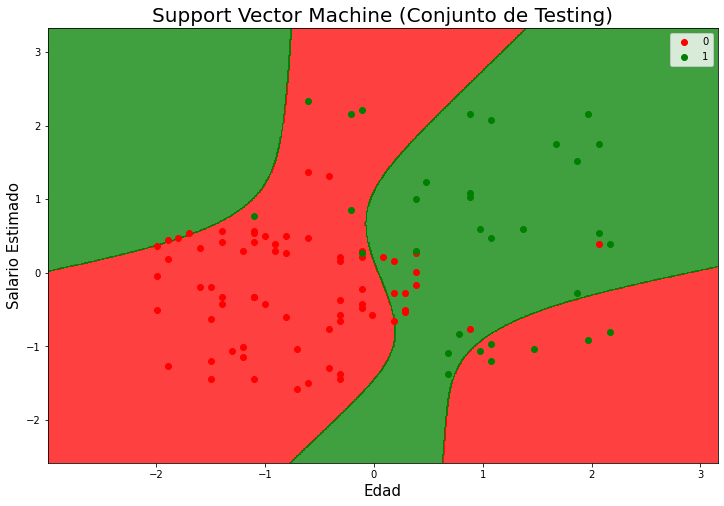

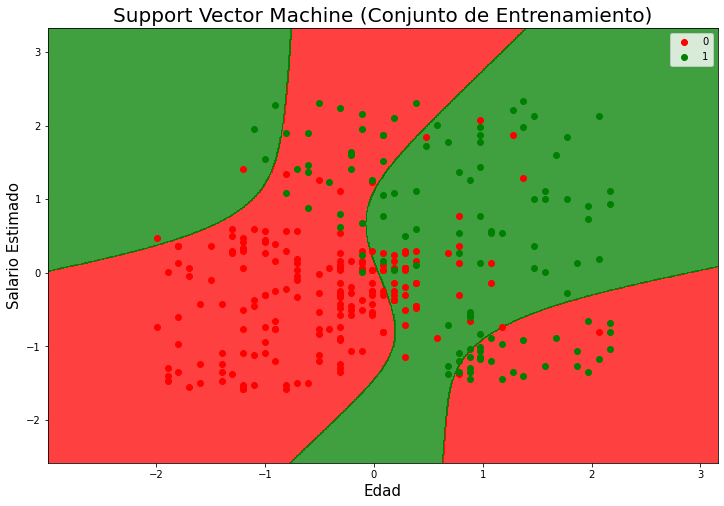

In [15]:
classifier_sigmoid = SVC(kernel='sigmoid', random_state=0)
classifier_sigmoid.fit(X_Train, Y_Train)
evaluar_clasificacion(classifier_sigmoid, X_Train, X_Test,  Y_Train, Y_Test)

2. ¿Cuál es la función del parámetro `Gamma`?

Gamma is a hyperparameter which we have to set before training model. Gamma decides how much curvature we want in a decision boundary.

Gamma high means more curvature.

Gamma low means less curvature.


3. Repite el ejercicio 1, modificando los valores de `Gamma`


              precision    recall  f1-score   support

           0       0.87      0.99      0.92        68
           1       0.96      0.69      0.80        32

    accuracy                           0.89       100
   macro avg       0.91      0.84      0.86       100
weighted avg       0.90      0.89      0.88       100



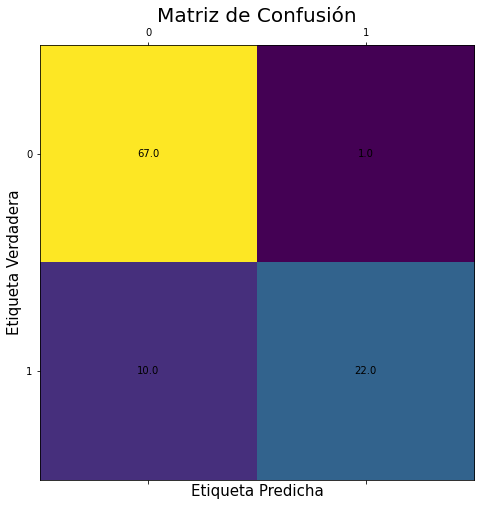

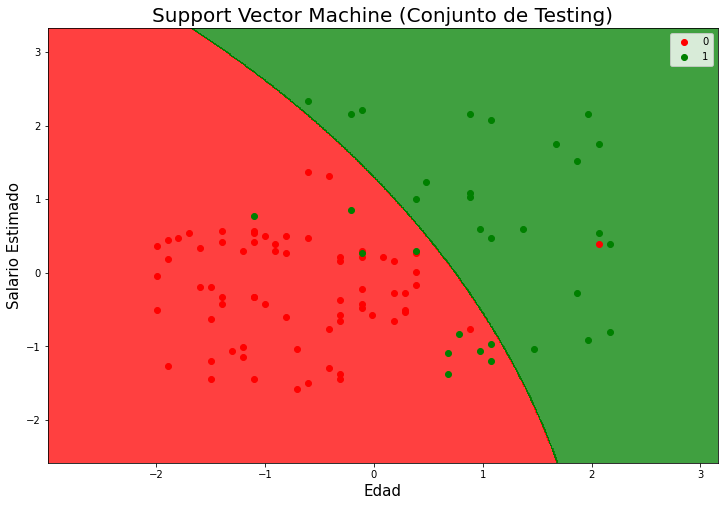

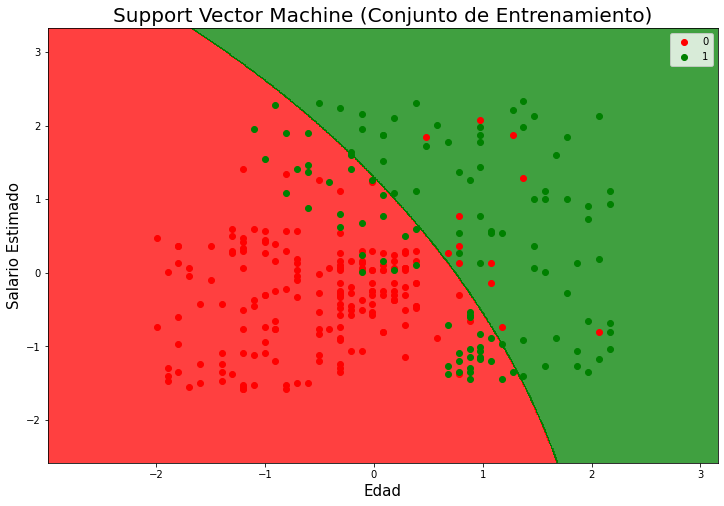

In [16]:
classifier_rbf= SVC(kernel='rbf', gamma=0.01, random_state=0)
classifier_rbf.fit(X_Train, Y_Train)
evaluar_clasificacion(classifier_rbf, X_Train, X_Test,  Y_Train, Y_Test)


              precision    recall  f1-score   support

           0       0.96      0.94      0.95        68
           1       0.88      0.91      0.89        32

    accuracy                           0.93       100
   macro avg       0.92      0.92      0.92       100
weighted avg       0.93      0.93      0.93       100



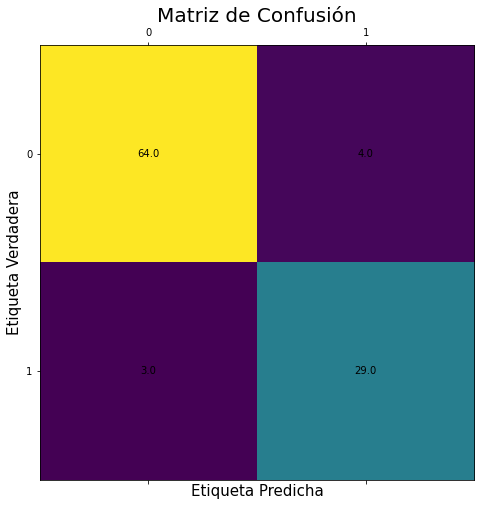

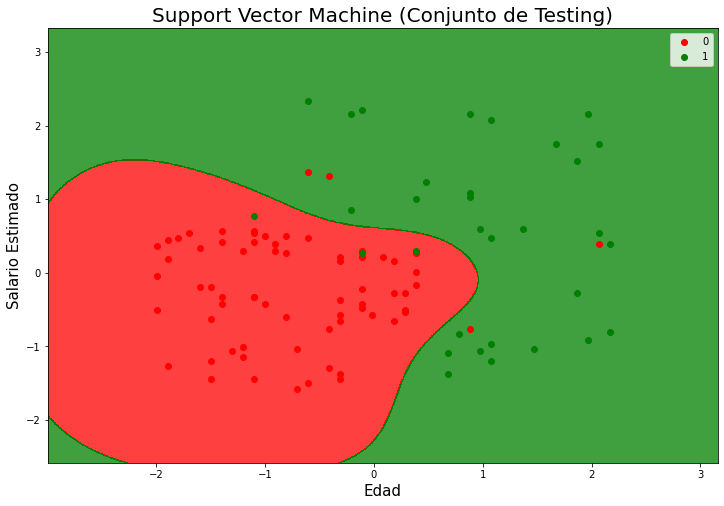

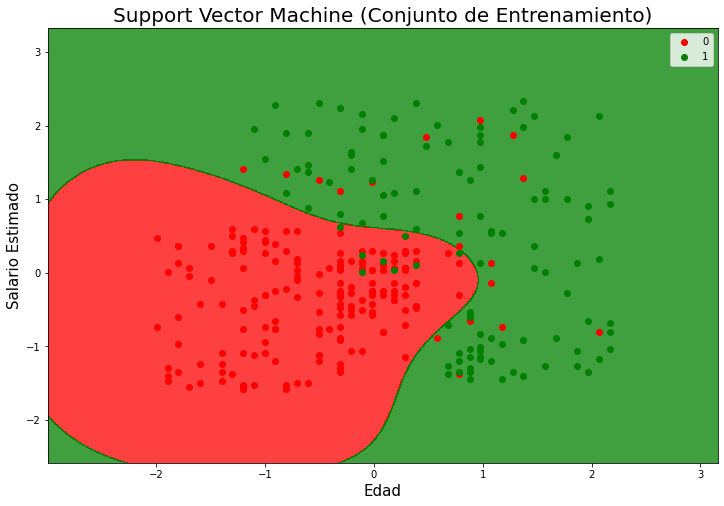

In [17]:
classifier_rbf= SVC(kernel='rbf', gamma=1, random_state=0)
classifier_rbf.fit(X_Train, Y_Train)
evaluar_clasificacion(classifier_rbf, X_Train, X_Test,  Y_Train, Y_Test)

4. Modifica el parámetro `C` del clasificador y observar cómo se modifican las fronteras encontradas por el clasificador y su performance. ¿Cómo se puede interpretar la acción de `C`? 

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        68
           1       0.88      0.88      0.88        32

    accuracy                           0.92       100
   macro avg       0.91      0.91      0.91       100
weighted avg       0.92      0.92      0.92       100



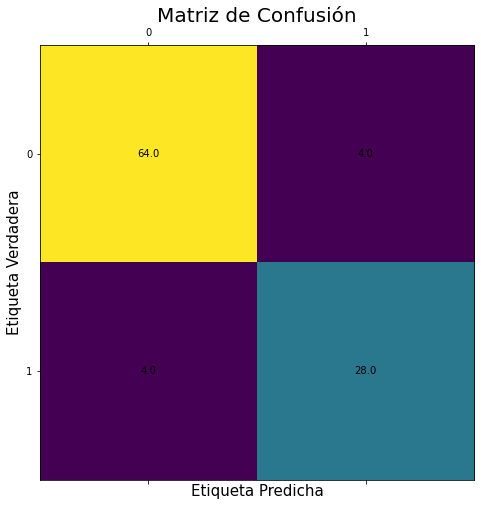

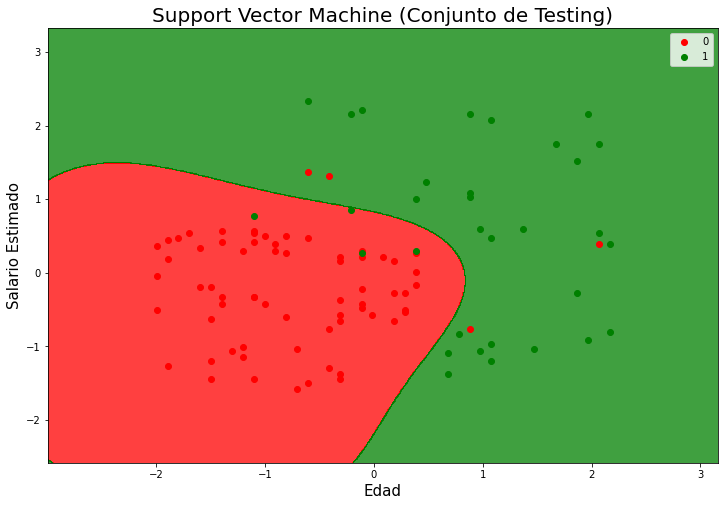

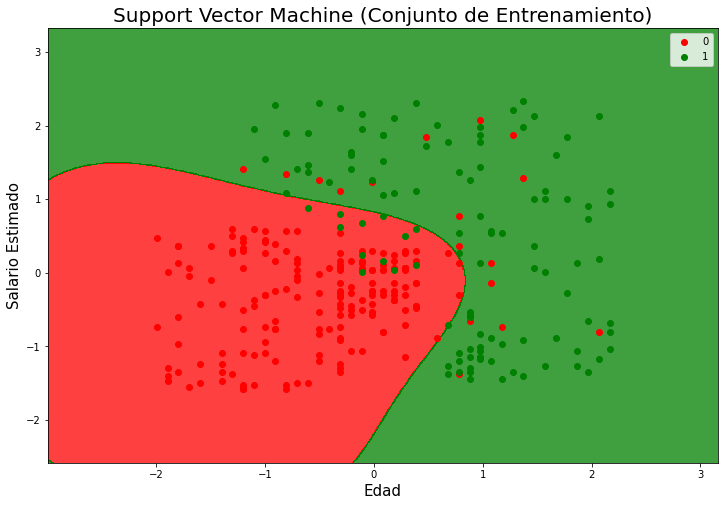

In [18]:
classifier_rbf2 = SVC(kernel='rbf',C=0.1,random_state=0)
classifier_rbf2.fit(X_Train, Y_Train)
evaluar_clasificacion(classifier_rbf2, X_Train, X_Test,  Y_Train, Y_Test)


              precision    recall  f1-score   support

           0       0.96      0.94      0.95        68
           1       0.88      0.91      0.89        32

    accuracy                           0.93       100
   macro avg       0.92      0.92      0.92       100
weighted avg       0.93      0.93      0.93       100



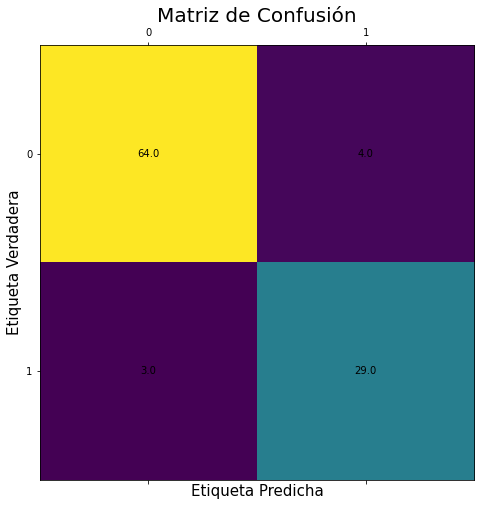

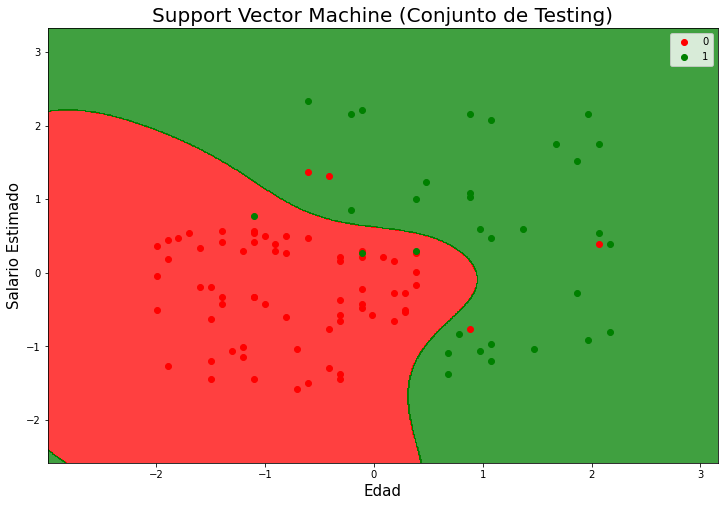

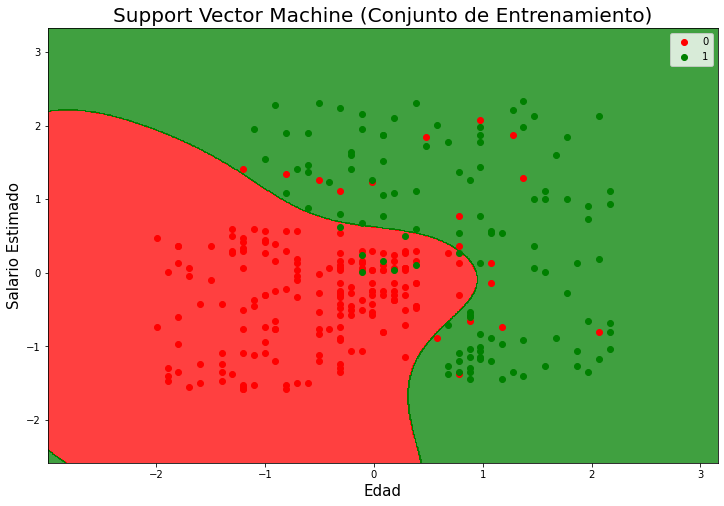

In [19]:
classifier_rbf2 = SVC(kernel='rbf',C=10,random_state=0)
classifier_rbf2.fit(X_Train, Y_Train)
evaluar_clasificacion(classifier_rbf2, X_Train, X_Test,  Y_Train, Y_Test)

## 2. Manos a la obra: Kernel + SVM

En base a todo lo visto en anteriormente, vamos a aplicar SVM al dataset `DS_Clase_04_iris.csv` ¿Cuantas clases tiene este dataset? ¿Es un problema multiclase? 

**Para investigar:** ¿Qué función cumple el parámetro `decision_function_shape` de la función SVC de scikit-learn?

Presentacion vieja +
https://stackoverflow.com/questions/43505451/which-decision-function-shape-for-sklearn-svm-svc-when-using-onevsrestclassifier


**Ejercicios:**

1. Implementa 3 clasificadores SVM con Kernels: `Polinómico`, `Gaussiano` y `Sigmoide`
2. Realiza la matriz de confusión y el reporte de clasificación para cada kernel.
3. ¿Qué Kernel produce los mejores resultados?


`Tip:` Utilizando el código visto al comienzo de la notebook, podés crear funciones que te permitan graficar la matriz de confusión y los límites de clasificación, sin tener que copiar y pegar todo el código.

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC


In [21]:
irisdata = pd.read_csv('DS_Bitácora_04_Iris.csv')
irisdata.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [22]:
X = irisdata.drop('Species', axis=1)
y = irisdata['Species']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [24]:
sc_X = StandardScaler()
X_train_sc = sc_X.fit_transform(X_train)
X_test_sc = sc_X.transform(X_test)

In [25]:
def evaluar_clasificacion2(classifier, X_train, X_test, y_train, y_test):
    
    y_pred = classifier.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)
    fig, ax = plt.subplots(figsize=(12,8))
    ax.matshow(cm)
    plt.title('Matriz de Confusión', fontsize=20)
    plt.ylabel('Etiqueta Verdadera', fontsize=15)
    plt.xlabel('Etiqueta Predicha', fontsize=15)
    for (i, j), z in np.ndenumerate(cm):
        ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')
        
    print(classification_report(y_test, y_pred))    

### 1. Kernel Polinómico

In [26]:
svc_poly = SVC(kernel='poly', C=1, gamma='auto', degree=2) #degree int, default=3, Degree of the polynomial kernel function (‘poly’). Ignored by all other kernels.

svc_poly.fit(X_train_sc, y_train)

SVC(C=1, degree=2, gamma='auto', kernel='poly')

                 precision    recall  f1-score   support

    Iris-setosa       1.00      0.89      0.94         9
Iris-versicolor       0.90      1.00      0.95         9
 Iris-virginica       0.92      0.92      0.92        12

       accuracy                           0.93        30
      macro avg       0.94      0.94      0.94        30
   weighted avg       0.94      0.93      0.93        30



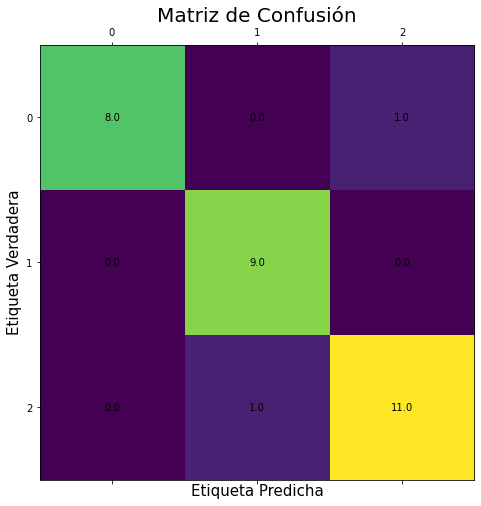

In [27]:
from sklearn.metrics import confusion_matrix, classification_report

evaluar_clasificacion2(svc_poly, X_train_sc, X_test_sc, y_train, y_test)

`Con  degree=8 como cambian las metricas?`
Bajan

### 2. Kernel Gaussiano

In [28]:
svc_gauss = SVC(kernel='rbf', gamma='auto') #gamma=1
svc_gauss.fit(X_train_sc, y_train)

SVC(gamma='auto')

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         9
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        12

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



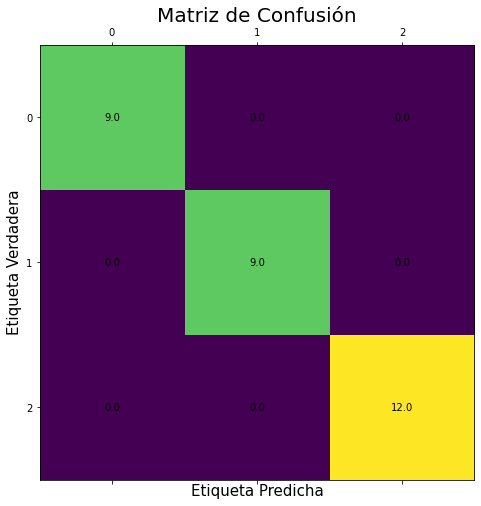

In [29]:
evaluar_clasificacion2(svc_gauss, X_train_sc, X_test_sc, y_train, y_test)

### 3. Kernel Sigmoide

In [30]:
svc_sigmoid = SVC(kernel='sigmoid', gamma='auto')
svc_sigmoid.fit(X_train_sc, y_train)

SVC(gamma='auto', kernel='sigmoid')

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         9
Iris-versicolor       0.90      1.00      0.95         9
 Iris-virginica       1.00      0.92      0.96        12

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



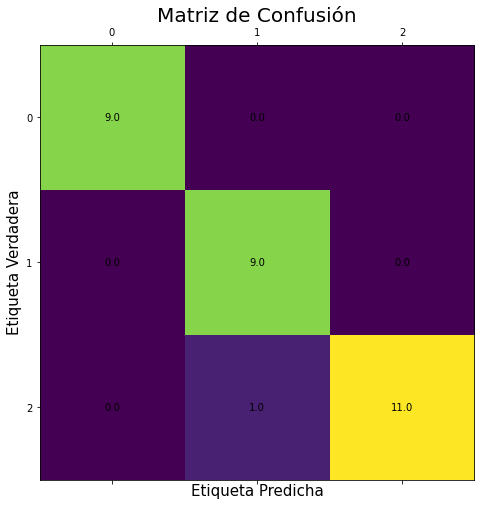

In [31]:
evaluar_clasificacion2(svc_sigmoid, X_train_sc, X_test_sc, y_train, y_test)